<a href="https://colab.research.google.com/github/atousaz/Data_driven_congestion_detection/blob/master/Xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import os,sys
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import img_to_array

Using TensorFlow backend.


In [0]:
!wget -c "https://www.dropbox.com/s/e7ns7rgyehr191x/SY_BEAN.zip"

--2019-10-07 01:48:40--  https://www.dropbox.com/s/e7ns7rgyehr191x/SY_BEAN.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/e7ns7rgyehr191x/SY_BEAN.zip [following]
--2019-10-07 01:48:41--  https://www.dropbox.com/s/raw/e7ns7rgyehr191x/SY_BEAN.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc714020c5a8c4b26f8fe9e3bb72.dl.dropboxusercontent.com/cd/0/inline/Ap8qa-NsLmiW1zQ8sztIPWXDgi9LYQmpI8kJwBAej0wYKXRZR5eZuIcEmJ4976CCopYiW5NQzkTRp8cvlmocLxqhVpyK2P2QnJXpwTojNMNuB5wBaUIkNhe_ps8a-RgTbt4/file# [following]
--2019-10-07 01:48:41--  https://uc714020c5a8c4b26f8fe9e3bb72.dl.dropboxusercontent.com/cd/0/inline/Ap8qa-NsLmiW1zQ8sztIPWXDgi9LYQmpI8kJwBAej0wYKXRZR5eZuIcEmJ4976CCopYiW5NQzkTRp8cvlmocLxqhVpyK2P2QnJXpwTojNMNuB5wBaUIkN

In [0]:
!unzip  SY_BEAN.zip

Archive:  SY_BEAN.zip
   creating: SY_BEAN/
   creating: SY_BEAN/Resistant/
  inflating: SY_BEAN/Resistant/moderately resistant (1).jpg  
  inflating: SY_BEAN/Resistant/moderately resistant (9).jpg  
  inflating: SY_BEAN/Resistant/moderately resistant (10).jpg  
  inflating: SY_BEAN/Resistant/moderately resistant (11).jpg  
  inflating: SY_BEAN/Resistant/moderately resistant (12).jpg  
  inflating: SY_BEAN/Resistant/moderately resistant (13).jpg  
  inflating: SY_BEAN/Resistant/moderately resistant (14).jpg  
  inflating: SY_BEAN/Resistant/moderately resistant (15).jpg  
  inflating: SY_BEAN/Resistant/moderately resistant (16).jpg  
  inflating: SY_BEAN/Resistant/moderately resistant (17).jpg  
  inflating: SY_BEAN/Resistant/moderately resistant (18).jpg  
  inflating: SY_BEAN/Resistant/moderately resistant (19).jpg  
  inflating: SY_BEAN/Resistant/moderately resistant (20).jpg  
  inflating: SY_BEAN/Resistant/moderately resistant (21).jpg  
  inflating: SY_BEAN/Resistant/moderately re

In [0]:
data = []
labels = []
nrow=299
ncolumns=299
channels=3
DATADIR="SY_BEAN/"
CATEGORIES=["Resistant","Susceptible"]
for caregory in CATEGORIES:
    path=os.path.join(DATADIR,caregory)
    for img in os.listdir(path):
        #print(img)
        img_=cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
        img_=cv2.resize(img_, (299, 299))
        img_= img_to_array(img_)
        data.append(img_)
        label =path.split(os.path.sep)[1]
        label = 1 if label == "Resistant" else 0

        labels.append(label)



x=np.array(data)
y=np.array(labels)

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=2)

In [0]:
from keras.applications.xception import Xception
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K


In [0]:
import warnings
warnings.filterwarnings('ignore')
base_model_x =Xception(include_top=False, weights='imagenet',input_shape=(299,299,3))

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
model=models.Sequential()
model.add(base_model_x)
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()
sgd = optimizers.SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['acc'])








83689472/83683744 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 10, 10, 2048)      20861480  
_________________________________________________________________
flatten_1 (Flatten)          (None, 204800)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               104858112 
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 125,720,105
Trainable params: 125,665,577
Non-trainable params: 54,528
_________________________________________________________________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
ntrain=len(x_train)
ntest=len(x_test)
batch_size=32

train_datagen=ImageDataGenerator(rescale = 1. / 255,
                                 rotation_range=40,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale = 1. / 255)
train_generator=train_datagen.flow(x_train,y_train,batch_size=batch_size)
test_generator=test_datagen.flow(x_test,y_test,batch_size=batch_size)

history=model.fit_generator(train_generator,
                            steps_per_epoch=ntrain//batch_size,
                            epochs=50,
                            validation_data=test_generator,
                            validation_steps=ntest//batch_size)

Epoch 1/50
3/3 [==============================] - 145s 48s/step - loss: 3.3425 - acc: 0.4503 - val_loss: 1.8143 - val_acc: 0.5484
Epoch 2/50
3/3 [==============================] - 130s 43s/step - loss: 1.0090 - acc: 0.5521 - val_loss: 0.6651 - val_acc: 0.5484
Epoch 3/50
3/3 [==============================] - 120s 40s/step - loss: 0.7038 - acc: 0.4815 - val_loss: 0.6584 - val_acc: 0.6452
Epoch 4/50
3/3 [==============================] - 131s 44s/step - loss: 0.6950 - acc: 0.5729 - val_loss: 0.6667 - val_acc: 0.6129
Epoch 5/50
3/3 [==============================] - 130s 43s/step - loss: 0.6587 - acc: 0.6250 - val_loss: 0.6626 - val_acc: 0.6452
Epoch 6/50
3/3 [==============================] - 121s 40s/step - loss: 0.6480 - acc: 0.6309 - val_loss: 0.6748 - val_acc: 0.6129
Epoch 7/50
3/3 [==============================] - 131s 44s/step - loss: 0.6149 - acc: 0.6458 - val_loss: 0.6680 - val_acc: 0.5484
Epoch 8/50
3/3 [==============================] - 125s 42s/step - loss: 0.6792 - acc: 0.60

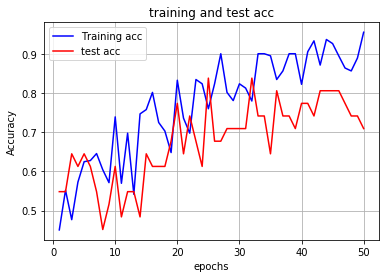

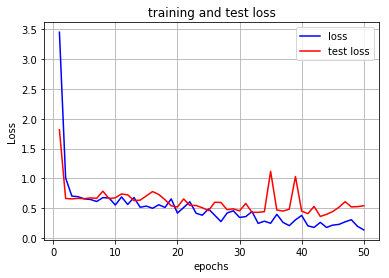

In [0]:
acc=history.history['acc']
test_acc=history.history['val_acc']
loss=history.history['loss']
test_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='Training acc')
plt.plot(epochs,test_acc,'r',label='test acc')
plt.title('training and test acc')
plt.grid()
plt.ylabel("Accuracy")
plt.xlabel("epochs")
plt.legend()

plt.figure()

plt.plot(epochs,loss,'b',label='loss')
plt.plot(epochs,test_loss,'r',label='test loss')
plt.title('training and test loss')

plt.grid()
plt.ylabel("Loss")
plt.xlabel("epochs")
plt.legend()
plt.show()